<a href="https://colab.research.google.com/github/danil99152/rit_test/blob/main/rit_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DONE
1. Общие трудозатраты на проект в часах;
2. Среднее время, затраченное на решение задач в часах;
3. Медианное время, затраченное на решение задач в часах;
4. Среднее время, затраченное на решение задач каждым из исполнителей в часах;
5. Рассчитать рентабельность проекта по формуле рентабельность = (прибыль*100)/доход.
Расчёт прибыли производить, как прибыль = доход – расходы;
6. Рассчитать среднее количество часов, отрабатываемое каждым сотрудником за день;
7. Вычислить дни отсутствия для каждого сотрудника, с учетом того, что все исполнители
обязаны были работать каждый будний день;
8. Рассчитать средний «вылет» специалиста из оценки в процентах.
9. Дополнительно необходимо сформировать сводный график по проекту с указанием
оценки (в часах) и фактических трудозатрат (в часах) по каждой из задач проекта в виде
отдельного файла png.

# Расписание входов
1. 21:18 04.08 - 0:41 05.08 - (перерыв примерно час)
2. 17:10 05.08 - 18:47 05.08 (перерыв полчаса)
3. 10:31 05.08 - 01.10 06.08 (перерыв час)
4. 04:13 06.08 - 06:30 06.08 (перерыв полчаса)

# Import

In [442]:
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import gc

# Обработка данных

In [443]:
path_a = '/content/drive/MyDrive/Тестовое для РИТ/Приложение А'
data_a = pd.read_table(path_a).rename(columns={"Дата": "Date", "Исполнитель": "Worker", "Задача": "Task", "Часы": "Hours"})
data_a['Date'] = pd.to_datetime(data_a['Date'], infer_datetime_format=True, format = "%Y-%m-%d", errors='coerce')
data_a

,Date,Worker,Task,Hours
0,2021-03-05,Вася,LOC-1,8
1,2021-03-05,Петя,LOC-2,8
2,2021-03-05,Маша,LOC-3,2
3,2021-03-05,Маша,LOC-4,4
4,2021-03-05,Маша,LOC-5,2
5,2021-04-05,Маша,LOC-5,2
6,2021-04-05,Маша,LOC-7,6
7,2021-04-05,Вася,LOC-8,4
8,2021-04-05,Петя,LOC-9,2
9,2021-04-05,Вася,LOC-10,4


In [444]:
path_b = '/content/drive/MyDrive/Тестовое для РИТ/Приложение B'
data_b = pd.read_table(path_b).rename(columns={"Задача": "Task", "Оценка": "Grade"})
data_b

,Task,Grade
0,LOC-1,6
1,LOC-2,4
2,LOC-3,2
3,LOC-4,4
4,LOC-5,4
5,LOC-6,12
6,LOC-7,6
7,LOC-8,4
8,LOC-9,2
9,LOC-10,3


In [445]:
path_c = '/content/drive/MyDrive/Тестовое для РИТ/Приложение C'
data_c = pd.read_table(path_c).rename(columns={"Исполнитель": "Worker", "Ставка": "Rate"})
data_c

,Worker,Rate
0,Вася,50
1,Маша,75
2,Петя,35


# Анализ

## Общие трудозатраты на проект в часах

In [446]:
data_a['Task'].unique()

array(['LOC-1', 'LOC-2', 'LOC-3', 'LOC-4', 'LOC-5', 'LOC-7', 'LOC-8',
       'LOC-9', 'LOC-10', 'LOC-11', 'LOC-12', 'LOC-13', 'LOC-14',
       'LOC-17', 'LOC-6', 'LOC-16', 'LOC-15', 'LOC-18', 'LOC-19',
       'LOC-20', 'LOC-21', 'LOC-22', 'LOC-23', 'LOC-24', 'LOC-25',
       'LOC-26', 'LOC-27', 'LOC-28', 'LOC-29', 'LOC-30', 'LOC-31',
       'LOC-32', 'LOC-33', 'LOC-34', 'LOC-35', 'LOC-36', 'LOC-37'],
      dtype=object)

In [447]:
hourcost = pd.DataFrame(data={'Task': [], 'Hours': []})
for project in data_a['Task'].unique():
  task = data_a[data_a['Task'] == project]['Task']
  hours = data_a[data_a['Task'] == project]['Hours'].sum()
  hourcost = hourcost.append({'Task': task.values[0], 'Hours': hours}, ignore_index=True)
hourcost

,Task,Hours
0,LOC-1,8.0
1,LOC-2,8.0
2,LOC-3,2.0
3,LOC-4,4.0
4,LOC-5,4.0
5,LOC-7,6.0
6,LOC-8,4.0
7,LOC-9,2.0
8,LOC-10,4.0
9,LOC-11,6.0


In [448]:
hourcost['Hours'].describe()

count    37.000000
mean      6.189189
std       3.770042
min       2.000000
25%       4.000000
50%       6.000000
75%       8.000000
max      16.000000
Name: Hours, dtype: float64

In [449]:
mean_hour = hourcost['Hours'].mean()
mean_hour

6.1891891891891895

In [450]:
median_hour = hourcost['Hours'].median()
median_hour

6.0

In [451]:
def getNum(value): #get a number of task
  return [int(s) for s in value.split('-') if s.isdigit()][0]

20033

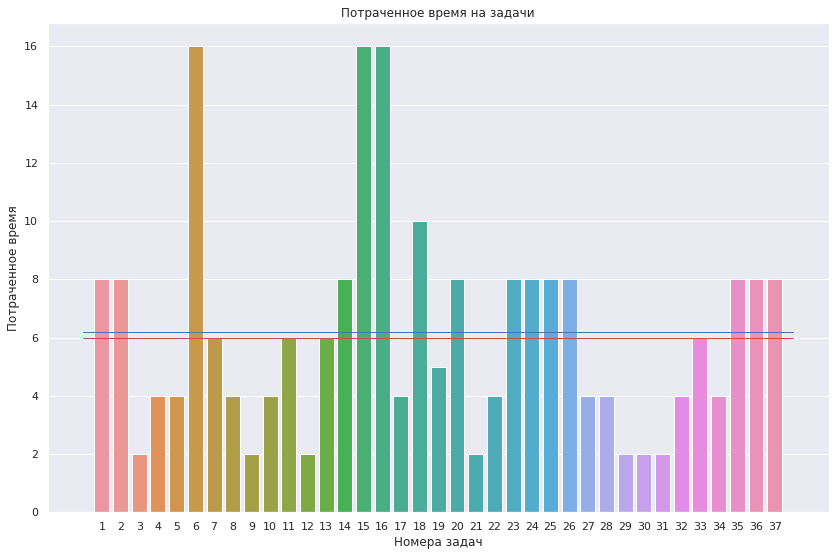

In [452]:
a4_dims = (14, 9)
fig, ax = pyplot.subplots(figsize=a4_dims)

timecost = hourcost.copy()
timecost['Task'] = timecost['Task'].apply(getNum)
g = sns.barplot(x="Task", y='Hours', data=timecost).set(title = 'Потраченное время на задачи',xlabel='Номера задач', ylabel='Потраченное время')
plt.plot([-1, 37], [mean_hour, mean_hour], linewidth=1)
plt.plot([-1, 37], [median_hour, median_hour], linewidth=1, color='r')

del timecost
gc.collect()

## Среднее время, затраченное на решение задач каждым из исполнителей в часах

In [453]:
data_a['Worker'].unique()

array(['Вася', 'Петя', 'Маша'], dtype=object)

In [454]:
hourcost_by_man = pd.DataFrame(data={'Worker': [], 'Hours': [], 'Mean time': []})
for project in data_a['Worker'].unique():
  task = data_a[data_a['Worker'] == project]['Worker']
  hours = data_a[data_a['Worker'] == project]['Hours'].sum()
  mean_hours = hours/len(data_a[data_a['Worker'] == project]['Hours'])
  hourcost_by_man = hourcost_by_man.append({'Worker': task.values[0], 'Hours': hours, 'Mean time': mean_hours}, ignore_index=True)
hourcost_by_man

,Worker,Hours,Mean time
0,Вася,84.0,5.600000
1,Петя,81.0,4.263158
2,Маша,64.0,5.818182


In [455]:
hourcost_by_man.describe()

,Hours,Mean time
count,3.000000,3.000000
mean,76.333333,5.227113
std,10.785793,0.841908
min,64.000000,4.263158
25%,72.500000,4.931579
50%,81.000000,5.600000
75%,82.500000,5.709091
max,84.000000,5.818182


Общее время

In [456]:
mean_hour = hourcost_by_man['Hours'].mean()
mean_hour

76.33333333333333

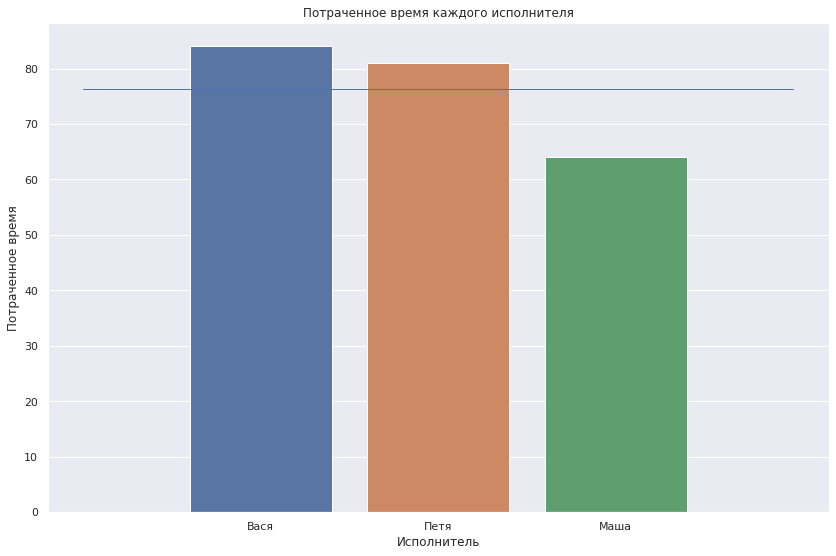

In [457]:
a4_dims = (14, 9)
fig, ax = pyplot.subplots(figsize=a4_dims)

g = sns.barplot(x="Worker", y='Hours', data=hourcost_by_man).set(title = 'Потраченное время каждого исполнителя',ylabel='Потраченное время', xlabel='Исполнитель')
plt.plot([-1, 3], [mean_hour, mean_hour], linewidth=1)

Среднее время

In [458]:
mean_mean_hour = hourcost_by_man['Mean time'].mean()
mean_mean_hour

5.2271132376395535

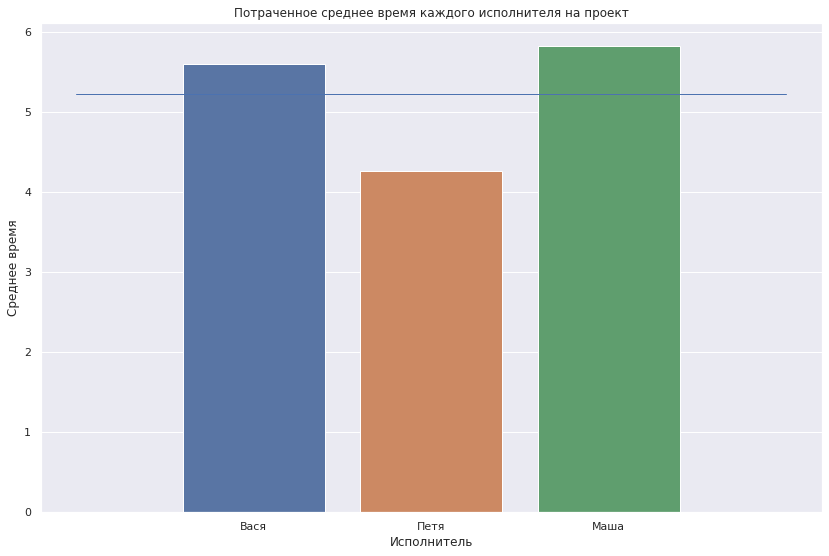

In [459]:
a4_dims = (14, 9)
fig, ax = pyplot.subplots(figsize=a4_dims)

g = sns.barplot(x="Worker", y='Mean time', data=hourcost_by_man).set(title = 'Потраченное среднее время каждого исполнителя на проект',ylabel='Среднее время', xlabel='Исполнитель')
plt.plot([-1, 3], [mean_mean_hour, mean_mean_hour], linewidth=1)

In [460]:
hourcost_by_man = hourcost_by_man.merge(data_c, on=['Worker', 'Worker'], how='left')
hourcost_by_man['Salary'] = hourcost_by_man['Hours'] * hourcost_by_man['Rate']
hourcost_by_man

,Worker,Hours,Mean time,Rate,Salary
0,Вася,84.0,5.600000,50,4200.0
1,Петя,81.0,4.263158,35,2835.0
2,Маша,64.0,5.818182,75,4800.0


## Рентабельность

In [461]:
data_a = data_a.merge(hourcost_by_man.filter(['Worker', 'Rate'],axis=1), on=['Worker', 'Worker'], how='left')

In [462]:
data_a['Cost'] = data_a['Hours']*data_a['Rate']

In [463]:
data_a = data_a.drop(['Rate'], axis=1)

In [464]:
data_a

,Date,Worker,Task,Hours,Cost
0,2021-03-05,Вася,LOC-1,8,400
1,2021-03-05,Петя,LOC-2,8,280
2,2021-03-05,Маша,LOC-3,2,150
3,2021-03-05,Маша,LOC-4,4,300
4,2021-03-05,Маша,LOC-5,2,150
5,2021-04-05,Маша,LOC-5,2,150
6,2021-04-05,Маша,LOC-7,6,450
7,2021-04-05,Вася,LOC-8,4,200
8,2021-04-05,Петя,LOC-9,2,70
9,2021-04-05,Вася,LOC-10,4,200


In [465]:
projects = pd.DataFrame(data={'Task': [], 'Cost': []})
for project in data_a['Task'].unique():
  task = data_a[data_a['Task'] == project]['Task']
  cost = data_a[data_a['Task'] == project]['Cost'].sum()
  projects = projects.append({'Task': task.values[0], 'Cost': cost}, ignore_index=True)
projects

,Task,Cost
0,LOC-1,400.0
1,LOC-2,280.0
2,LOC-3,150.0
3,LOC-4,300.0
4,LOC-5,300.0
5,LOC-7,450.0
6,LOC-8,200.0
7,LOC-9,70.0
8,LOC-10,200.0
9,LOC-11,210.0


In [466]:
income = 24000
projects['Profit'] = income - projects['Cost']
profitability = (projects['Profit'].sum()*100)/income
print("Рентабельность проекта =", profitability)

Рентабельность проекта = 3650.6875


In [467]:
projects = projects.merge(hourcost.filter(['Task', 'Hours'],axis=1), on=['Task', 'Task'], how='left')
del hourcost
gc.collect()

9354

## Рассчитать среднее количество часов, отрабатываемое каждым сотрудником за день

In [468]:
def getDayofWeek(date):
  return date.dayofweek
  
dates = data_a.drop(['Task', 'Cost'], axis=1)
dates = dates.sort_values('Date')

hours_list = []
for worker, date in zip(dates['Worker'], dates['Date']):
  hours = dates[(dates['Worker'] == worker) & (dates['Date'] == date)]['Hours']
  hours_list.append(hours.sum())
dates['Hours'] = hours_list

del hours_list
gc.collect()

dates = dates.drop_duplicates()
dates = dates.reset_index(drop=True)
dates['Day of week'] = dates['Date'].apply(getDayofWeek)
dates

,Date,Worker,Hours,Day of week
0,2021-03-05,Вася,8,4
1,2021-03-05,Петя,8,4
2,2021-03-05,Маша,8,4
3,2021-04-05,Маша,8,0
4,2021-04-05,Вася,10,0
5,2021-04-05,Петя,8,0
6,2021-05-05,Петя,8,2
7,2021-05-05,Вася,8,2
8,2021-05-13,Петя,8,3
9,2021-05-13,Вася,8,3


In [469]:
average_worker_time_list = []
for worker in hourcost_by_man['Worker']:
  average_worker_time = dates[dates['Worker'] == worker]['Hours'].sum()/len(dates[dates['Worker'] == worker]['Hours'])
  average_worker_time_list.append(average_worker_time)
hourcost_by_man['Mean worktime'] = average_worker_time_list

del average_worker_time_list
gc.collect()

hourcost_by_man

,Worker,Hours,Mean time,Rate,Salary,Mean worktime
0,Вася,84.0,5.600000,50,4200.0,8.400000
1,Петя,81.0,4.263158,35,2835.0,7.363636
2,Маша,64.0,5.818182,75,4800.0,8.000000


In [470]:
mean_worktime = hourcost_by_man['Mean worktime'].mean()
mean_worktime

7.921212121212122

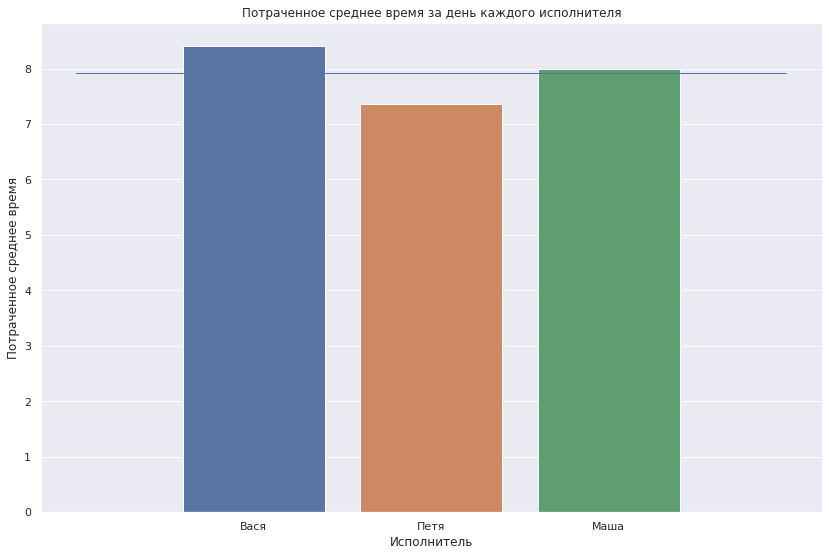

In [471]:
a4_dims = (14, 9)
fig, ax = pyplot.subplots(figsize=a4_dims)

g = sns.barplot(x="Worker", y='Mean worktime', data=hourcost_by_man).set(title = 'Потраченное среднее время за день каждого исполнителя',ylabel='Потраченное среднее время', xlabel='Исполнитель')
plt.plot([-1, 3], [mean_worktime, mean_worktime], linewidth=1)

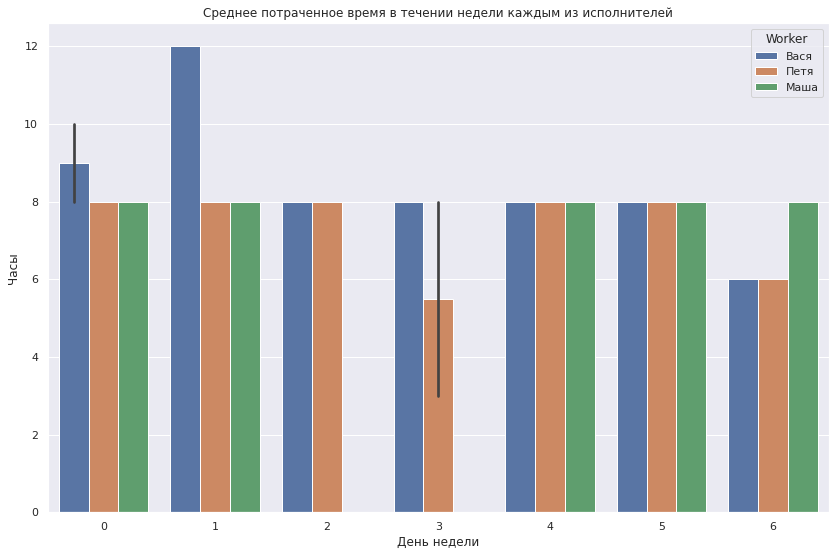

In [472]:
a4_dims = (14, 9)
fig, ax = pyplot.subplots(figsize=a4_dims)

g = sns.barplot(x="Day of week", y='Hours', hue='Worker', data=dates).set(title = 'Среднее потраченное время в течении недели каждым из исполнителей', xlabel='День недели', ylabel='Часы')

In [473]:
mean_overall_hour = hourcost_by_man['Hours'].mean()
mean_overall_hour

76.33333333333333

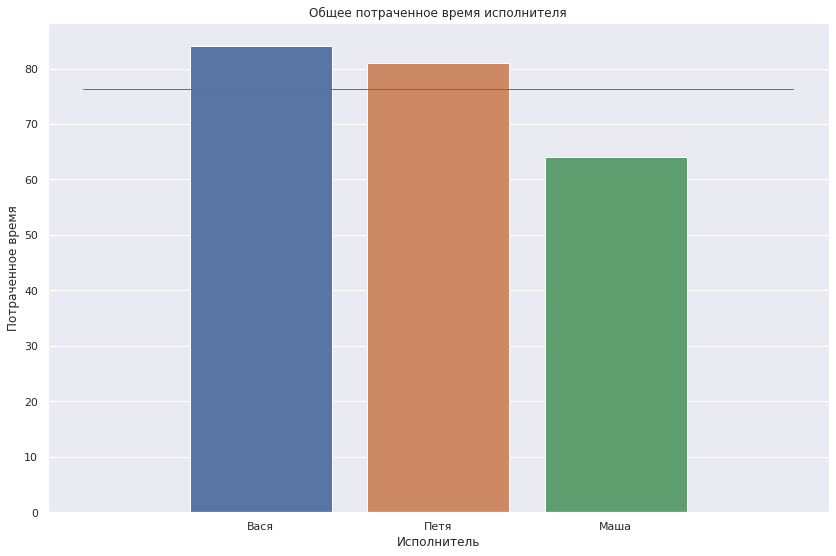

In [474]:
a4_dims = (14, 9)
fig, ax = pyplot.subplots(figsize=a4_dims)

g = sns.barplot(x="Worker", y='Hours', data=hourcost_by_man).set(title = 'Общее потраченное время исполнителя',ylabel='Потраченное время', xlabel='Исполнитель')
plt.plot([-1, 3], [mean_overall_hour, mean_overall_hour], linewidth=1)

## Вычислить дни отсутствия для каждого сотрудника, с учетом того, что все исполнители обязаны были работать каждый будний день

In [475]:
#Дни прогула сотрудников в будни
dates[(dates['Hours'] < 8) & (dates['Day of week'] < 5)]

,Date,Worker,Hours,Day of week
19,2021-08-05,Петя,3,3


Как я понял задачу "Вылет": найти отношение разности времени от оценки к оценке

## Рассчитать средний «вылет» специалиста из оценки в процентах

In [476]:
grade = data_a.drop(['Date', 'Cost'],axis=1)
hours_list = []
for worker, task in zip(grade['Worker'], grade['Task']):
  hours = grade[(grade['Worker'] == worker) & (grade['Task'] == task)]['Hours']
  hours_list.append(hours.sum())
grade['Hours'] = hours_list

del hours_list
gc.collect()

grade = grade.drop_duplicates()
grade = grade.reset_index(drop=True)
grade = grade.merge(data_b, how = 'left', on=['Task','Task'])
grade['Mean late'] = (grade['Hours'] - grade['Grade'])/grade['Grade'] *100 #Средний "вылет"
grade

,Worker,Task,Hours,Grade,Mean late
0,Вася,LOC-1,8,6,33.333333
1,Петя,LOC-2,8,4,100.000000
2,Маша,LOC-3,2,2,0.000000
3,Маша,LOC-4,4,4,0.000000
4,Маша,LOC-5,4,4,0.000000
5,Маша,LOC-7,6,6,0.000000
6,Вася,LOC-8,4,4,0.000000
7,Петя,LOC-9,2,2,0.000000
8,Вася,LOC-10,4,3,33.333333
9,Петя,LOC-11,6,6,0.000000


In [477]:
mean_worker_grade_list = []
for worker in hourcost_by_man['Worker']:
  grades = grade[grade['Worker'] == worker]['Mean late']
  mean_worker_grade_list.append(grades.sum()/len(grades))
hourcost_by_man['Mean worker late'] = mean_worker_grade_list

del mean_worker_grade_list
gc.collect()

hourcost_by_man

,Worker,Hours,Mean time,Rate,Salary,Mean worktime,Mean worker late
0,Вася,84.0,5.600000,50,4200.0,8.400000,26.190476
1,Петя,81.0,4.263158,35,2835.0,7.363636,32.142857
2,Маша,64.0,5.818182,75,4800.0,8.000000,62.962963


In [478]:
mean_worker_late = hourcost_by_man['Mean worker late'].mean()
mean_worker_late

40.432098765432094

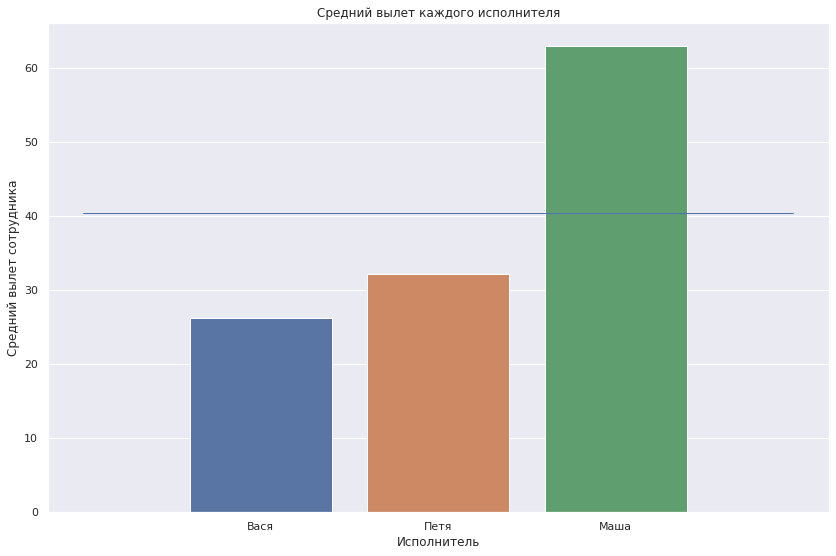

In [479]:
a4_dims = (14, 9)
fig, ax = pyplot.subplots(figsize=a4_dims)

g = sns.barplot(x="Worker", y='Mean worker late', data=hourcost_by_man).set(title = 'Средний вылет каждого исполнителя', xlabel='Исполнитель', ylabel='Средний вылет сотрудника')
plt.plot([-1, 3], [mean_worker_late, mean_worker_late], linewidth=1)

35

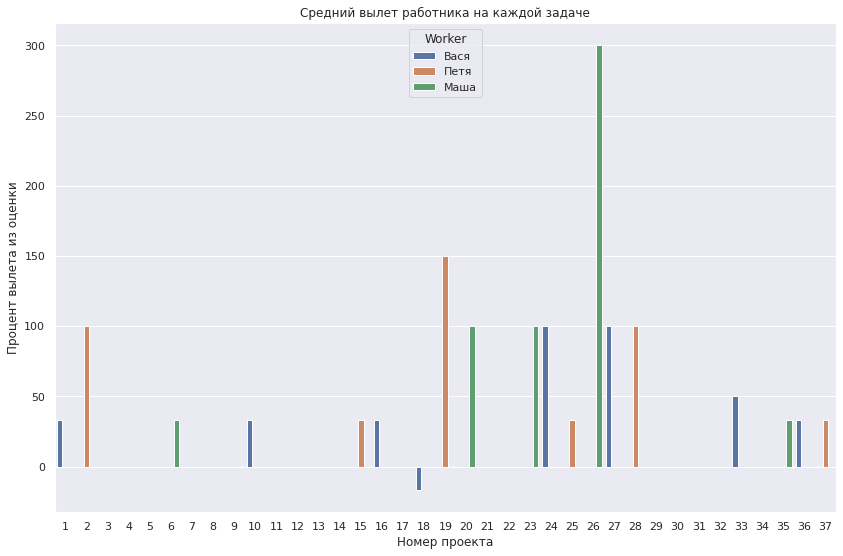

In [480]:
a4_dims = (14, 9)
fig, ax = pyplot.subplots(figsize=a4_dims)

quality = grade.copy()
quality['Task'] = quality['Task'].apply(getNum)
g = sns.barplot(x="Task", y='Mean late', hue='Worker', data=quality).set(title = 'Средний вылет работника на каждой задаче',xlabel='Номер проекта', ylabel='Процент вылета из оценки')

del quality
gc.collect()

## Дополнительно необходимо сформировать сводный график по проекту

In [481]:
projects = projects.merge(data_b, on=['Task', 'Task'], how='left')

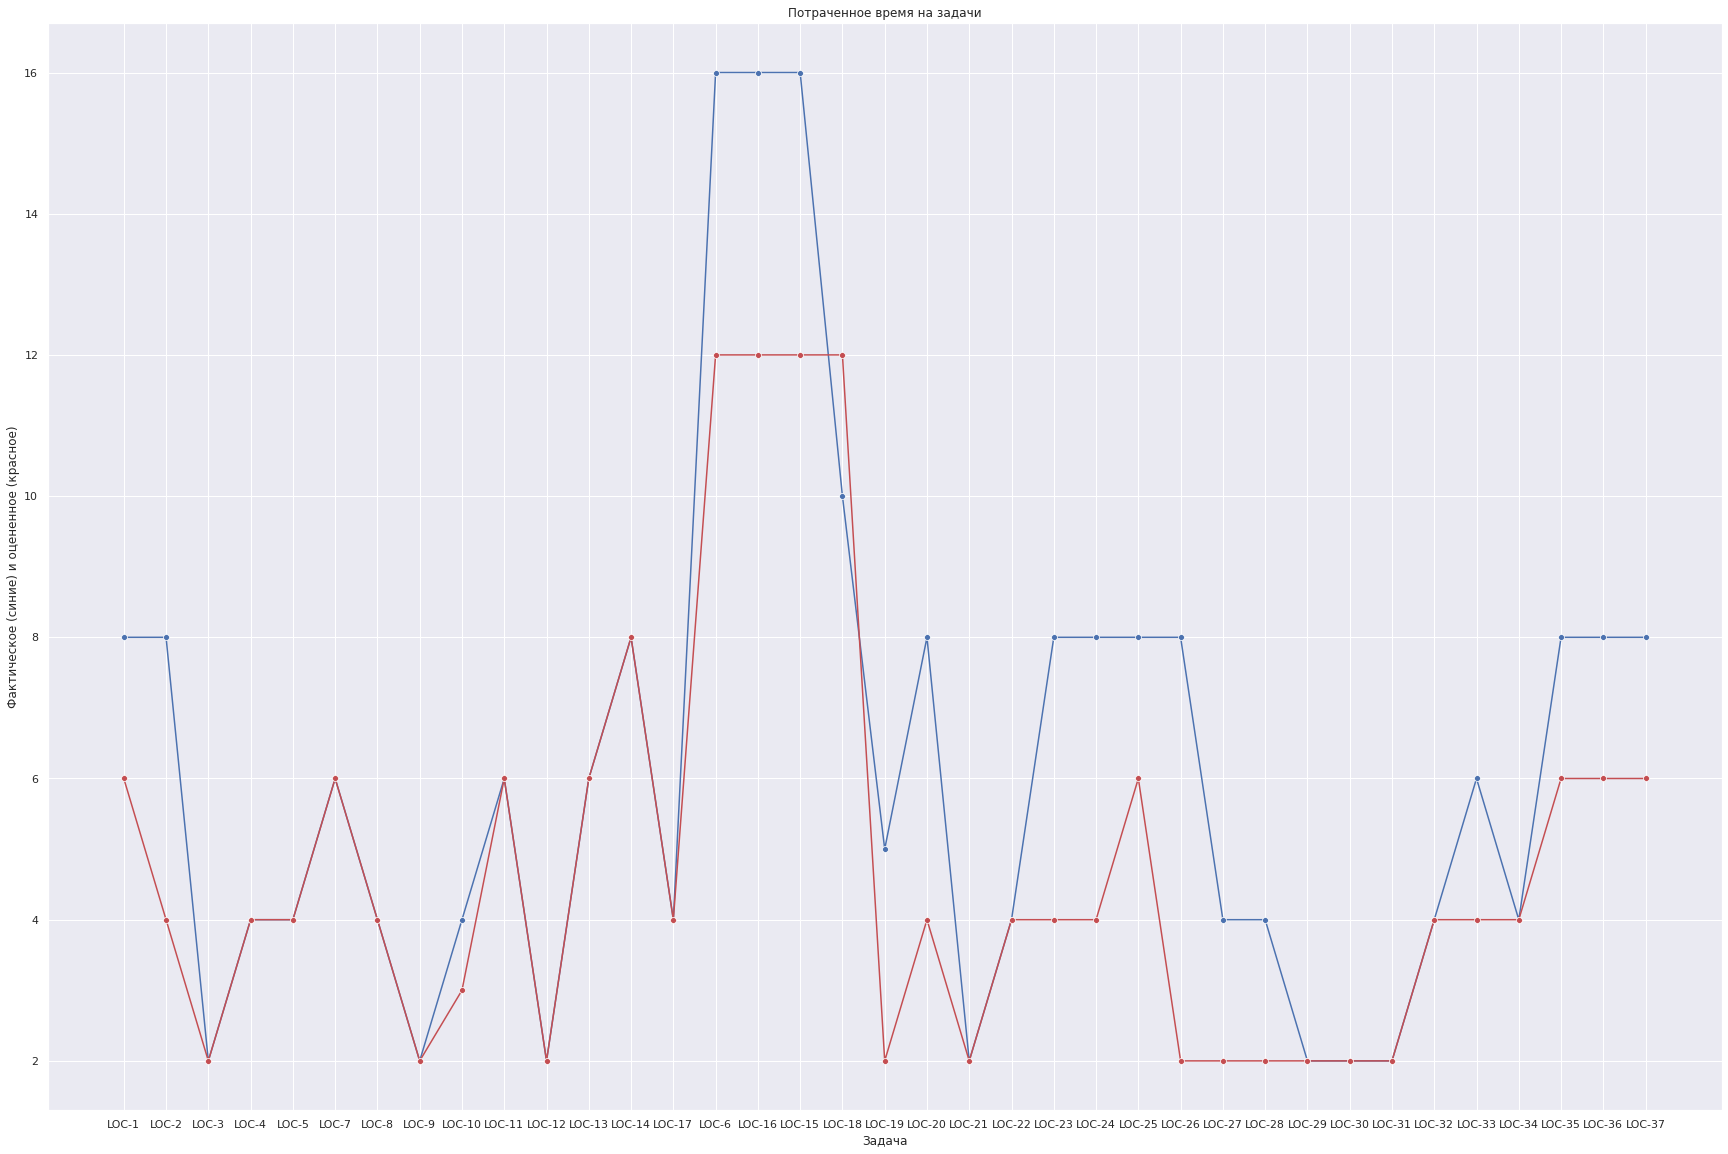

In [482]:
timecost = projects.copy()
timecost['Task'] = timecost['Task']
g = sns.lineplot(x="Task", y='Hours', data=timecost, marker='o', color='b')
g = sns.lineplot(x="Task", y='Grade', data=timecost, marker='o', color='r')
g.set(title = 'Потраченное время на задачи',xlabel='Задача', ylabel='Фактическое (синие) и оцененное (красное)')
sns.set(rc={'figure.figsize':(30, 20)})
g.figure.savefig('hourcost.png')

In [483]:
print("Всего потрачено на проект", data_a['Hours'].sum(), "человеко-часов")

Всего потрачено на проект 229 человеко-часов
